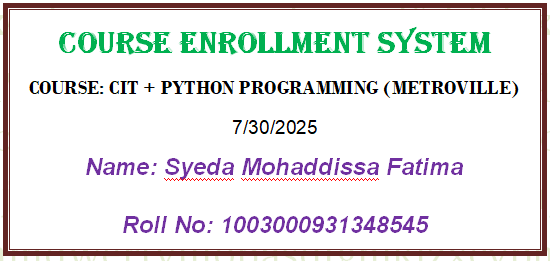

# ***COURSE ENROLLMENT SYSTEM***

🟢 Program Flowchart


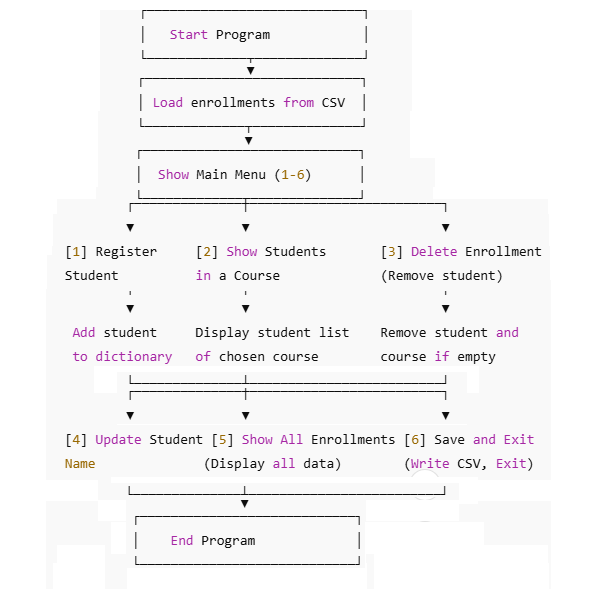

In [ ]:
# Assignment: Coure Enrollment System
# Author: Syeda Mohaddissa Fatima Roll No. 1003000931348545
# Date: 30 July, 2025
# ================== IMPORT REQUIRED MODULES ==================
import csv          # for reading/writing CSV files
import os           # for checking if file exists

# ================== CONFIGURATION ==================
FILENAME = 'enrollments.csv'   # CSV file where all enrollments are saved


# ================== DATA HANDLING FUNCTIONS ==================

def load_enrollments():
    """
    Loads enrollment data from the CSV file into a dictionary.
    Format: {course: {"cost": float, "students": [list of student names]}}
    """
    enrollments = {}  # Create an empty dictionary to store data

    # Check if the CSV file exists
    if os.path.exists(FILENAME):
        with open(FILENAME, mode='r', newline='', encoding='utf-8') as file:
            reader = csv.reader(file)  # Read the file using CSV reader

            # Loop through each row in the CSV
            for row in reader:
                if len(row) == 3:  # Each row should have 3 values: course, cost, student
                    course, cost, student = row

                    # If course is not already in dictionary, create a new entry
                    if course not in enrollments:
                        enrollments[course] = {"cost": float(cost), "students": []}

                    # Add student to the course list
                    enrollments[course]["students"].append(student)

    # Return the dictionary of enrollments
    return enrollments


def save_enrollments(enrollments):
    """
    Saves the enrollment data back into the CSV file.
    """
    with open(FILENAME, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # Write each student record in CSV format
        for course, data in enrollments.items():
            for student in data["students"]:
                writer.writerow([course, data["cost"], student])


# ================== CORE FEATURE FUNCTIONS ==================

def register_student(enrollments):
    """
    Registers a new student to a course.
    If course is new, asks for the course cost and adds it to the dictionary.
    """
    # Ask user for student name
    student = input("👤 Enter student name: ").strip()
    if not student:  # Validate input
        print("⚠️ Student name cannot be empty!")
        return

    # Ask user for course name
    course = input("📘 Enter course name: ").strip()
    if not course:
        print("⚠️ Course name cannot be empty!")
        return

    # If course is not in the data, ask for its cost
    if course not in enrollments:
        while True:
            try:
                cost = float(input(f"💰 Enter cost for the course '{course}': "))
                break  # Exit loop if input is valid
            except ValueError:
                print("⚠️ Please enter a valid numeric cost.")

        # Create a new course entry
        enrollments[course] = {"cost": cost, "students": []}

    # Add the student to the course if not already enrolled
    if student not in enrollments[course]["students"]:
        enrollments[course]["students"].append(student)
        print(f"✅ {student} successfully registered in {course}!")
    else:
        print("⚠️ This student is already enrolled in this course.")


def show_students(enrollments):
    """
    Displays all students enrolled in a specific course.
    """
    course = input("📘 Enter course name to view students: ").strip()

    # Check if the course exists and has students
    if course in enrollments and enrollments[course]["students"]:
        cost = enrollments[course]["cost"]
        students = enrollments[course]["students"]

        # Print formatted table
        print(f"\n===== STUDENTS IN {course.upper()} =====")
        print(f"💰 Course Cost (per student): Rs {cost:.2f}")
        print("S.No.  Student Name                Cost")
        print("------------------------------------------")

        # Loop through students and print with numbering
        for i, student in enumerate(students, start=1):
            print(f"{i:<5} {student:<25} Rs{cost:.2f}")
    else:
        print(f"⚠️ No students found for course '{course}'.")


def delete_enrollment(enrollments):
    """
    Deletes a student's enrollment from a specific course.
    If no students remain in a course, the course itself is removed.
    """
    student = input("👤 Enter student name to delete: ").strip()
    course = input("📘 Enter course name: ").strip()

    if course in enrollments and student in enrollments[course]["students"]:
        # Remove the student from the course
        enrollments[course]["students"].remove(student)
        print(f"❌ {student} has been removed from {course}.")

        # If course becomes empty, delete it as well
        if not enrollments[course]["students"]:
            del enrollments[course]
            print(f"ℹ️ Course '{course}' removed as no students remain.")
    else:
        print("⚠️ Enrollment record not found.")


def update_student(enrollments):
    """
    Updates (renames) a student's name in a specific course.
    """
    course = input("📘 Enter course name: ").strip()
    old_name = input("👤 Enter current student name: ").strip()
    new_name = input("✏️ Enter new name: ").strip()

    if course in enrollments and old_name in enrollments[course]["students"]:
        index = enrollments[course]["students"].index(old_name)
        enrollments[course]["students"][index] = new_name
        print(f"✅ Student name updated from {old_name} to {new_name} in {course}.")
    else:
        print("⚠️ Student or course not found.")


def show_all(enrollments):
    """
    Displays all courses and their enrolled students in a structured format.
    """
    print("\n===== ALL COURSE ENROLLMENTS =====")

    if not enrollments:
        print("⚠️ No enrollments found.")
    else:
        for course, data in enrollments.items():
            cost = data["cost"]
            students = data["students"]
            print(f"\n📘 {course} (Cost: Rs {cost:.2f}, Students: {len(students)})")
            print("S.No.  Student Name")
            print("----------------------")

            # Print student list
            for i, student in enumerate(students, start=1):
                print(f"{i:<5} {student}")


# ================== MAIN MENU ==================

def main():
    """
    The main function that runs the Course Enrollment System menu.
    """
    # Load data from CSV file
    enrollments = load_enrollments()

    # Infinite loop to keep menu running until user exits
    while True:
        print("\n===== COURSE ENROLLMENT SYSTEM =====")
        print("1️⃣  Register Student")
        print("2️⃣  Show Students in a Course")
        print("3️⃣  Delete Enrollment")
        print("4️⃣  Update Student Name")
        print("5️⃣  Show All Enrollments")
        print("6️⃣  Save and Exit")

        choice = input("👉 Enter your choice (1-6): ")

        # Call functions based on user choice
        if choice == '1':
            register_student(enrollments)
        elif choice == '2':
            show_students(enrollments)
        elif choice == '3':
            delete_enrollment(enrollments)
        elif choice == '4':
            update_student(enrollments)
        elif choice == '5':
            show_all(enrollments)
        elif choice == '6':
            save_enrollments(enrollments)
            print("💾 Data saved successfully. ✅ Exiting...")
            break  # Exit the loop and end program
        else:
            print("❌ Invalid choice! Please enter a number from 1 to 6.")


# ================== PROGRAM ENTRY POINT ==================
# This ensures the program only runs when executed directly
if __name__ == "__main__":
    main()


===== COURSE ENROLLMENT SYSTEM =====
1️⃣  Register Student
2️⃣  Show Students in a Course
3️⃣  Delete Enrollment
4️⃣  Update Student Name
5️⃣  Show All Enrollments
6️⃣  Save and Exit
👉 Enter your choice (1-6): 1
👤 Enter student name: Syeda Mohaddissa Fatima
📘 Enter course name: Python
💰 Enter cost for the course 'Python': 0
✅ Syeda Mohaddissa Fatima successfully registered in Python!

===== COURSE ENROLLMENT SYSTEM =====
1️⃣  Register Student
2️⃣  Show Students in a Course
3️⃣  Delete Enrollment
4️⃣  Update Student Name
5️⃣  Show All Enrollments
6️⃣  Save and Exit
👉 Enter your choice (1-6): 1
👤 Enter student name: Areesh
📘 Enter course name: Python
✅ Areesh successfully registered in Python!

===== COURSE ENROLLMENT SYSTEM =====
1️⃣  Register Student
2️⃣  Show Students in a Course
3️⃣  Delete Enrollment
4️⃣  Update Student Name
5️⃣  Show All Enrollments
6️⃣  Save and Exit
👉 Enter your choice (1-6): 1
👤 Enter student name: Ali Haider
📘 Enter course name: Ms Office
💰 Enter cost for the 

**Thank you Teacher**
	We extend our heartfelt thanks to our respected teacher for successfully completing the Python course and guiding us throughout the learning journey. Their valuable teaching, support, and encouragement have been instrumental in helping us develop this Course Enrollment System project. This project reflects the knowledge and skills gained during the course, and we deeply appreciate the opportunity to apply what we have learned.
